# Accuracy test for ndarray-odeint

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## generate data for accuracy test

In [3]:
! cargo test

    Finished debug [unoptimized + debuginfo] target(s) in 0.0 secs
     Running target/debug/deps/accuracy-001baaa41df9329d

running 4 tests
test euler ... ok
test heun ... ok
test rk4 ... ok
test diag_rk4 ... ok

test result: ok. 4 passed; 0 failed; 0 ignored; 0 measured

     Running target/debug/deps/clv-2c156f3375a48c8f

running 0 tests

test result: ok. 0 passed; 0 failed; 0 ignored; 0 measured

     Running target/debug/deps/lorenz63-e4c434b869b0d89e

running 0 tests

test result: ok. 0 passed; 0 failed; 0 ignored; 0 measured

     Running target/debug/deps/lorenz63_si-6d123bd5d876c1b4

running 0 tests

test result: ok. 0 passed; 0 failed; 0 ignored; 0 measured

     Running target/debug/deps/lyapunov-993a16b6ff7f5a97

running 3 tests
test jacobian_linearity ... ok
test jacobian_matrix_shape ... ok
test exponents_l63 ... ok

test result: ok. 3 passed; 0 failed; 0 ignored; 0 measured

     Running target/debug/deps/ndarray_odeint-86ee6ff5176225d9

running 0 tests

test result: ok.

## analysis

In [4]:
euler = pd.read_csv("euler.csv").dropna().set_index("dt")
heun = pd.read_csv("heun.csv").dropna().set_index("dt")
rk4 = pd.read_csv("rk4.csv").dropna().set_index("dt")
diag_rk4 = pd.read_csv("diag_rk4.csv").dropna().set_index("dt")

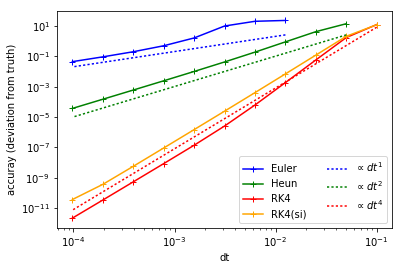

In [5]:
plt.plot(euler, "b+-", label="Euler")
plt.plot(heun, "g+-", label="Heun")
plt.plot(rk4, "r+-", label="RK4")
plt.plot(diag_rk4, "+-", color="orange", label="RK4(si)")
plt.plot(euler.index, 200*euler.index, "b:", label=r"$\propto dt^1$")
plt.plot(heun.index, 1000*heun.index**2, "g:", label=r"$\propto dt^2$")
plt.plot(rk4.index, 80000*rk4.index**4, "r:", label=r"$\propto dt^4$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("dt")
plt.ylabel("accuray (deviation from truth)")
plt.axis("tight")
plt.legend(loc=4, ncol=2)

(si) means semi-implicit scheme